# Red Profunda Perceptrón Multicapa
## Imports Necesarios

In [1]:
# Imports necesarios
import numpy as np
import pandas as pd
#import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
plt.rcParams['figure.figsize'] = (15, 8)
plt.style.use('ggplot')
#from sklearn import linear_model
#from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers.core import Dense
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.models import load_model



Using TensorFlow backend.
/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarn

## Cargar archivo de Entradas

In [2]:
np.random.seed(1)

In [5]:
#cargamos los datos de entrada
#data = pd.read_csv("/Users/manuelmoya/Documents/USACH/2019-1er/Tesis/1.Desarrollo/05.AnalisisDatos/Datos/wf1_train_fin_serie.csv", index_col=0)
data = pd.read_csv("../05.AnalisisDatos/Datos/wf1_train_fin_serie.csv", index_col=0)

#veamos cuantas dimensiones y registros contiene
#data.shape

In [6]:
# Ver los 1ros registros
data.head()

,ws,wp1t-44,wp1t-43,wp1t-42,wp1t-41,wp1t-40,wp1t-39,wp1t-38,wp1t-37,wp1t-36,...,wp1t-9,wp1t-8,wp1t-7,wp1t-6,wp1t-5,wp1t-4,wp1t-3,wp1t-2,wp1t-1,wp1
4,2.93,0.25423,0.254231,0.25423,0.25423,0.254229,0.254228,0.254228,0.254229,0.254228,...,0.254221,0.25422,0.25422,0.25422,0.254219,0.254219,0.254219,0.254218,0.254218,0.035
5,2.96,0.25423,0.254231,0.25423,0.25423,0.254229,0.254228,0.254228,0.254229,0.254228,...,0.254221,0.25422,0.25422,0.25422,0.254219,0.254219,0.254219,0.254218,0.035000,0.005
6,2.81,0.25423,0.254231,0.25423,0.25423,0.254229,0.254228,0.254228,0.254229,0.254228,...,0.254221,0.25422,0.25422,0.25422,0.254219,0.254219,0.254219,0.035000,0.005000,0.000
7,2.73,0.25423,0.254231,0.25423,0.25423,0.254229,0.254228,0.254228,0.254229,0.254228,...,0.254221,0.25422,0.25422,0.25422,0.254219,0.254219,0.035000,0.005000,0.000000,0.000
8,2.87,0.25423,0.254231,0.25423,0.25423,0.254229,0.254228,0.254228,0.254229,0.254228,...,0.254221,0.25422,0.25422,0.25422,0.254219,0.035000,0.005000,0.000000,0.000000,0.010


## Separar Datos de Entrenamiento (Train) y Test

In [7]:
# 75% train y 25% test
data_train, data_test = train_test_split(data, test_size=0.2, random_state=200)

dataset_train = data_train.values
x_train = dataset_train[:,0:45]
y_train = dataset_train[:,45]


dataset_test = data_test.values
x_test = dataset_test[:,0:45]
y_test = dataset_test[:,45]


In [8]:
x_train[0]

array([5.35486486, 0.266     , 0.266     , 0.266     , 0.266     ,
       0.266     , 0.266     , 0.266     , 0.266     , 0.272     ,
       0.278     , 0.283     , 0.289     , 0.295     , 0.301     ,
       0.306     , 0.312     , 0.318     , 0.324     , 0.329     ,
       0.335     , 0.341     , 0.347     , 0.352     , 0.358     ,
       0.364     , 0.37      , 0.375     , 0.381     , 0.387     ,
       0.393     , 0.398     , 0.404     , 0.433     , 0.439     ,
       0.444     , 0.45      , 0.456     , 0.462     , 0.467     ,
       0.473     , 0.479     , 0.485     , 0.49      , 0.496     ])

In [9]:
y_train

array([0.502, 0.251, 0.927, ..., 0.145, 0.045, 0.115])

## Crear Modelo, Entrenarlo y Predecir

In [178]:
## Funcion para obtener score R2
#from keras import backend as K
#def r2_keras(y_true, y_pred):
#    SS_res =  K.sum(K.square(y_true - y_pred)) 
#    SS_tot = K.sum(K.square(y_true - K.mean(y_true))) 
#    return ( 1 - SS_res/(SS_tot + K.epsilon()) )


In [21]:

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=50)
mch = ModelCheckpoint('best_model_deep.h5', monitor='val_mean_squared_error', mode='min', verbose=1, save_best_only=True)


model = Sequential()
model.add(Dense(45, input_dim=45, activation='relu'))

model.add(Dense(135, activation="relu"))
model.add(Dense(135, activation="relu"))
model.add(Dense(135, activation="relu"))
model.add(Dense(135, activation="relu"))
model.add(Dense(135, activation="relu"))
model.add(Dense(135, activation="relu"))

model.add(Dense(135, activation="relu"))
model.add(Dense(135, activation="relu"))
model.add(Dense(135, activation="relu"))
model.add(Dense(135, activation="relu"))
model.add(Dense(135, activation="relu"))
model.add(Dense(135, activation="relu"))

model.add(Dense(1, activation='linear'))
 
model.compile(loss='mean_absolute_error',
              optimizer='adam',
              metrics=['mean_squared_error'])
 
hist=model.fit(x_train, y_train, epochs=1000, validation_data=(x_test, y_test), callbacks=[es,mch])




Train on 76876 samples, validate on 19220 samples
Epoch 1/1000
76876/76876 [==============================] - 16s 209us/step - loss: 0.0512 - mean_squared_error: 0.0073 - val_loss: 0.0352 - val_mean_squared_error: 0.0047

Epoch 00001: val_mean_squared_error improved from inf to 0.00466, saving model to best_model_deep.h5
Epoch 2/1000
76876/76876 [==============================] - 17s 215us/step - loss: 0.0373 - mean_squared_error: 0.0051 - val_loss: 0.0433 - val_mean_squared_error: 0.0054

Epoch 00002: val_mean_squared_error did not improve from 0.00466
Epoch 3/1000
76876/76876 [==============================] - 14s 188us/step - loss: 0.0353 - mean_squared_error: 0.0050 - val_loss: 0.0310 - val_mean_squared_error: 0.0047

Epoch 00003: val_mean_squared_error did not improve from 0.00466
Epoch 4/1000
76876/76876 [==============================] - 14s 180us/step - loss: 0.0332 - mean_squared_error: 0.0048 - val_loss: 0.0310 - val_mean_squared_error: 0.0045

Epoch 00004: val_mean_squared_e


Epoch 00033: val_mean_squared_error improved from 0.00363 to 0.00350, saving model to best_model_deep.h5
Epoch 34/1000
76876/76876 [==============================] - 14s 186us/step - loss: 0.0237 - mean_squared_error: 0.0036 - val_loss: 0.0265 - val_mean_squared_error: 0.0036

Epoch 00034: val_mean_squared_error did not improve from 0.00350
Epoch 35/1000
76876/76876 [==============================] - 14s 181us/step - loss: 0.0235 - mean_squared_error: 0.0035 - val_loss: 0.0239 - val_mean_squared_error: 0.0038

Epoch 00035: val_mean_squared_error did not improve from 0.00350
Epoch 36/1000
76876/76876 [==============================] - 14s 183us/step - loss: 0.0233 - mean_squared_error: 0.0035 - val_loss: 0.0232 - val_mean_squared_error: 0.0037

Epoch 00036: val_mean_squared_error did not improve from 0.00350
Epoch 37/1000
76876/76876 [==============================] - 14s 184us/step - loss: 0.0233 - mean_squared_error: 0.0035 - val_loss: 0.0236 - val_mean_squared_error: 0.0037

Epoch 0

76876/76876 [==============================] - 14s 182us/step - loss: 0.0217 - mean_squared_error: 0.0031 - val_loss: 0.0213 - val_mean_squared_error: 0.0033

Epoch 00067: val_mean_squared_error improved from 0.00334 to 0.00332, saving model to best_model_deep.h5
Epoch 68/1000
76876/76876 [==============================] - 14s 188us/step - loss: 0.0214 - mean_squared_error: 0.0031 - val_loss: 0.0235 - val_mean_squared_error: 0.0033

Epoch 00068: val_mean_squared_error did not improve from 0.00332
Epoch 69/1000
76876/76876 [==============================] - 14s 182us/step - loss: 0.0216 - mean_squared_error: 0.0031 - val_loss: 0.0253 - val_mean_squared_error: 0.0035

Epoch 00069: val_mean_squared_error did not improve from 0.00332
Epoch 70/1000
76876/76876 [==============================] - 14s 186us/step - loss: 0.0216 - mean_squared_error: 0.0030 - val_loss: 0.0233 - val_mean_squared_error: 0.0036

Epoch 00070: val_mean_squared_error did not improve from 0.00332
Epoch 71/1000
76876/76

76876/76876 [==============================] - 14s 186us/step - loss: 0.0203 - mean_squared_error: 0.0028 - val_loss: 0.0221 - val_mean_squared_error: 0.0033

Epoch 00101: val_mean_squared_error did not improve from 0.00319
Epoch 102/1000
76876/76876 [==============================] - 14s 185us/step - loss: 0.0203 - mean_squared_error: 0.0027 - val_loss: 0.0227 - val_mean_squared_error: 0.0034

Epoch 00102: val_mean_squared_error did not improve from 0.00319
Epoch 103/1000
76876/76876 [==============================] - 14s 187us/step - loss: 0.0203 - mean_squared_error: 0.0027 - val_loss: 0.0237 - val_mean_squared_error: 0.0033

Epoch 00103: val_mean_squared_error did not improve from 0.00319
Epoch 104/1000
76876/76876 [==============================] - 14s 187us/step - loss: 0.0204 - mean_squared_error: 0.0028 - val_loss: 0.0224 - val_mean_squared_error: 0.0033

Epoch 00104: val_mean_squared_error did not improve from 0.00319
Epoch 105/1000
76876/76876 [==============================]

76876/76876 [==============================] - 14s 182us/step - loss: 0.0196 - mean_squared_error: 0.0026 - val_loss: 0.0233 - val_mean_squared_error: 0.0033

Epoch 00135: val_mean_squared_error did not improve from 0.00316
Epoch 136/1000
76876/76876 [==============================] - 14s 186us/step - loss: 0.0209 - mean_squared_error: 0.0028 - val_loss: 0.0225 - val_mean_squared_error: 0.0033

Epoch 00136: val_mean_squared_error did not improve from 0.00316
Epoch 137/1000
76876/76876 [==============================] - 14s 185us/step - loss: 0.0197 - mean_squared_error: 0.0026 - val_loss: 0.0212 - val_mean_squared_error: 0.0032

Epoch 00137: val_mean_squared_error did not improve from 0.00316
Epoch 138/1000
76876/76876 [==============================] - 14s 186us/step - loss: 0.0195 - mean_squared_error: 0.0026 - val_loss: 0.0222 - val_mean_squared_error: 0.0033

Epoch 00138: val_mean_squared_error did not improve from 0.00316
Epoch 139/1000
76876/76876 [==============================]

76876/76876 [==============================] - 14s 185us/step - loss: 0.0188 - mean_squared_error: 0.0024 - val_loss: 0.0216 - val_mean_squared_error: 0.0032

Epoch 00169: val_mean_squared_error did not improve from 0.00308
Epoch 170/1000
76876/76876 [==============================] - 14s 187us/step - loss: 0.0188 - mean_squared_error: 0.0024 - val_loss: 0.0210 - val_mean_squared_error: 0.0032

Epoch 00170: val_mean_squared_error did not improve from 0.00308
Epoch 171/1000
76876/76876 [==============================] - 14s 185us/step - loss: 0.0189 - mean_squared_error: 0.0025 - val_loss: 0.0210 - val_mean_squared_error: 0.0032

Epoch 00171: val_mean_squared_error did not improve from 0.00308
Epoch 172/1000
76876/76876 [==============================] - 14s 184us/step - loss: 0.0190 - mean_squared_error: 0.0025 - val_loss: 0.0201 - val_mean_squared_error: 0.0031

Epoch 00172: val_mean_squared_error did not improve from 0.00308
Epoch 173/1000
76876/76876 [==============================]

76876/76876 [==============================] - 14s 182us/step - loss: 0.0187 - mean_squared_error: 0.0024 - val_loss: 0.0207 - val_mean_squared_error: 0.0032

Epoch 00203: val_mean_squared_error did not improve from 0.00308
Epoch 204/1000
76876/76876 [==============================] - 14s 187us/step - loss: 0.0186 - mean_squared_error: 0.0024 - val_loss: 0.0206 - val_mean_squared_error: 0.0033

Epoch 00204: val_mean_squared_error did not improve from 0.00308
Epoch 205/1000
76876/76876 [==============================] - 14s 185us/step - loss: 0.0182 - mean_squared_error: 0.0023 - val_loss: 0.0201 - val_mean_squared_error: 0.0032

Epoch 00205: val_mean_squared_error did not improve from 0.00308
Epoch 206/1000
76876/76876 [==============================] - 14s 186us/step - loss: 0.0186 - mean_squared_error: 0.0024 - val_loss: 0.0204 - val_mean_squared_error: 0.0031

Epoch 00206: val_mean_squared_error did not improve from 0.00308
Epoch 207/1000
76876/76876 [==============================]

76876/76876 [==============================] - 14s 187us/step - loss: 0.0181 - mean_squared_error: 0.0023 - val_loss: 0.0205 - val_mean_squared_error: 0.0033

Epoch 00237: val_mean_squared_error did not improve from 0.00308
Epoch 238/1000
76876/76876 [==============================] - 14s 186us/step - loss: 0.0182 - mean_squared_error: 0.0023 - val_loss: 0.0208 - val_mean_squared_error: 0.0031

Epoch 00238: val_mean_squared_error improved from 0.00308 to 0.00307, saving model to best_model_deep.h5
Epoch 239/1000
76876/76876 [==============================] - 14s 187us/step - loss: 0.0180 - mean_squared_error: 0.0023 - val_loss: 0.0202 - val_mean_squared_error: 0.0032

Epoch 00239: val_mean_squared_error did not improve from 0.00307
Epoch 240/1000
76876/76876 [==============================] - 14s 189us/step - loss: 0.0184 - mean_squared_error: 0.0023 - val_loss: 0.0207 - val_mean_squared_error: 0.0032

Epoch 00240: val_mean_squared_error did not improve from 0.00307
Epoch 241/1000
7687

### Obtener Mejor Modelo

In [22]:
# load the saved model
best_model = load_model('best_model_deep.h5')


In [23]:
#best_model.summary()

### Generar Predicción

In [24]:
#y_pred_train = model.predict(x_train)
#y_pred_test = model.predict(x_test)

y_pred_train = best_model.predict(x_train)
y_pred_test = best_model.predict(x_test)

## Obtener Metricas del Modelo

In [25]:

# evaluate the model
scores_best = best_model.evaluate(x_train, y_train)
scores_best[0]


76876/76876 [==============================] - 4s 54us/step


0.01769325202789848

In [26]:
#print("R2:",  r2_keras(y_train, y_pred_train) )
print("\n%s: %.2f%%" % (best_model.metrics_names[0], scores_best[0]*100))
print("\n%s: %.2f%%" % (best_model.metrics_names[1], scores_best[1]*100))

#print (model.predict(x_train).round())


loss: 1.77%

mean_squared_error: 0.22%


In [27]:
from sklearn.metrics import r2_score
print('Coefficient of determination Train (R^2): %.2f' % r2_score(y_train, y_pred_train))
print('Coefficient of determination Test (R^2): %.2f' % r2_score(y_test, y_pred_test))



Coefficient of determination Train (R^2): 0.96
Coefficient of determination Test (R^2): 0.95


## Graficar Resultados

In [28]:
neuronas =45
capas=1
#pred_train = best_model.predict(x_train)
corr = np.corrcoef(y_train, y_pred_train[:, 0])


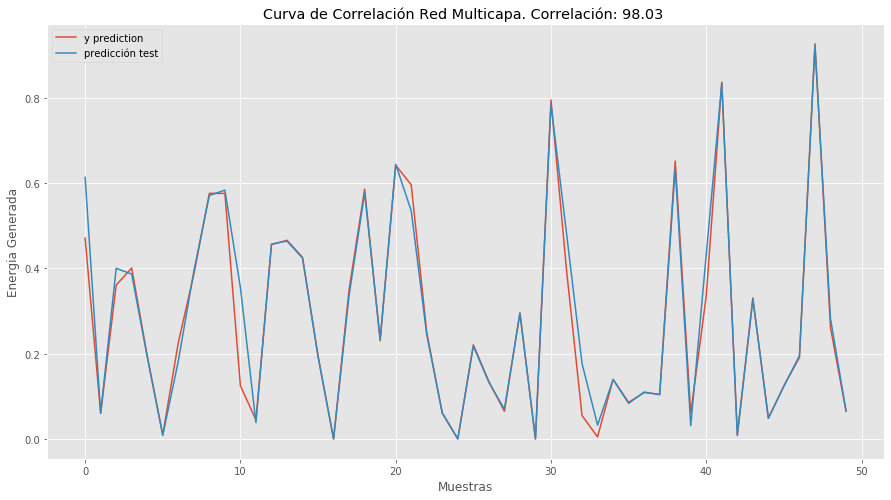

In [29]:
pred_test_plot = y_pred_test[2000:2050]
y_test_plot = y_test[2000:2050]

plt.plot(y_test_plot, label ="y prediction")
plt.plot(pred_test_plot, label ="predicción test")
#plt.plot(trainPredictPlot, label ="train pred" )
plt.title("Curva de Correlación Red Multicapa. Correlación: %.2f " % ( corr[1][0] * 100))
plt.ylabel("Energia Generada")
plt.xlabel("Muestras")
plt.legend()
plt.show()

In [30]:
print(hist.history.keys())

dict_keys(['val_loss', 'val_mean_squared_error', 'loss', 'mean_squared_error'])


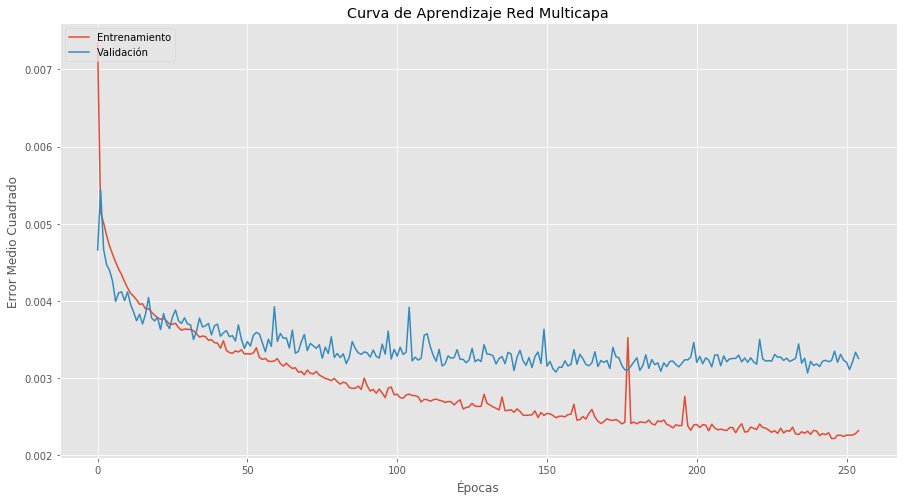

In [31]:
# Plot training & validation accuracy values
plt.plot(hist.history['mean_squared_error'])
plt.plot(hist.history['val_mean_squared_error'])
plt.title('Curva de Aprendizaje Red Multicapa')
plt.ylabel('Error Medio Cuadrado')
plt.xlabel('Épocas')
plt.legend(['Entrenamiento', 'Validación'], loc='upper left')
plt.show()

In [20]:
# Plot training & validation loss values
#plt.plot(hist.history['loss'])
#plt.plot(hist.history['val_loss'])
#plt.title('Función de Pérdida (loss)')
#plt.ylabel('Pérdida (loss)')
#plt.xlabel('Épocas')
#plt.legend(['Train', 'Validation'], loc='upper left')
#plt.show()

### Guarda Datos de Predicción

In [ ]:
## Gurdar regresión

In [77]:
df_pred = pd.DataFrame(data=pred_test_plot, columns=["pred"])
#df_pred
df_pred.to_csv('/Users/manuelmoya/Documents/USACH/2019-1er/Tesis/1.Desarrollo/05.AnalisisDatos/Datos/pred_deepNN.csv')
